# <center>DATA.ML.200 Pattern Recognition and Machine Learning</center>

## <center>Exercise 2</center>

### <center>Md. Abdullah-Al Mamun</center>

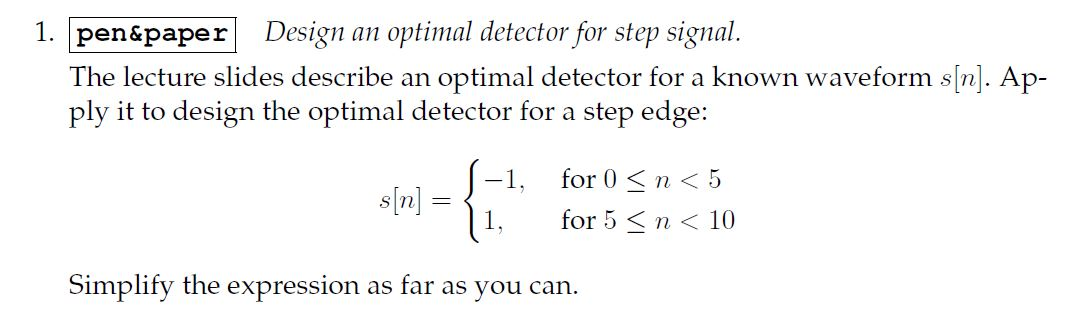

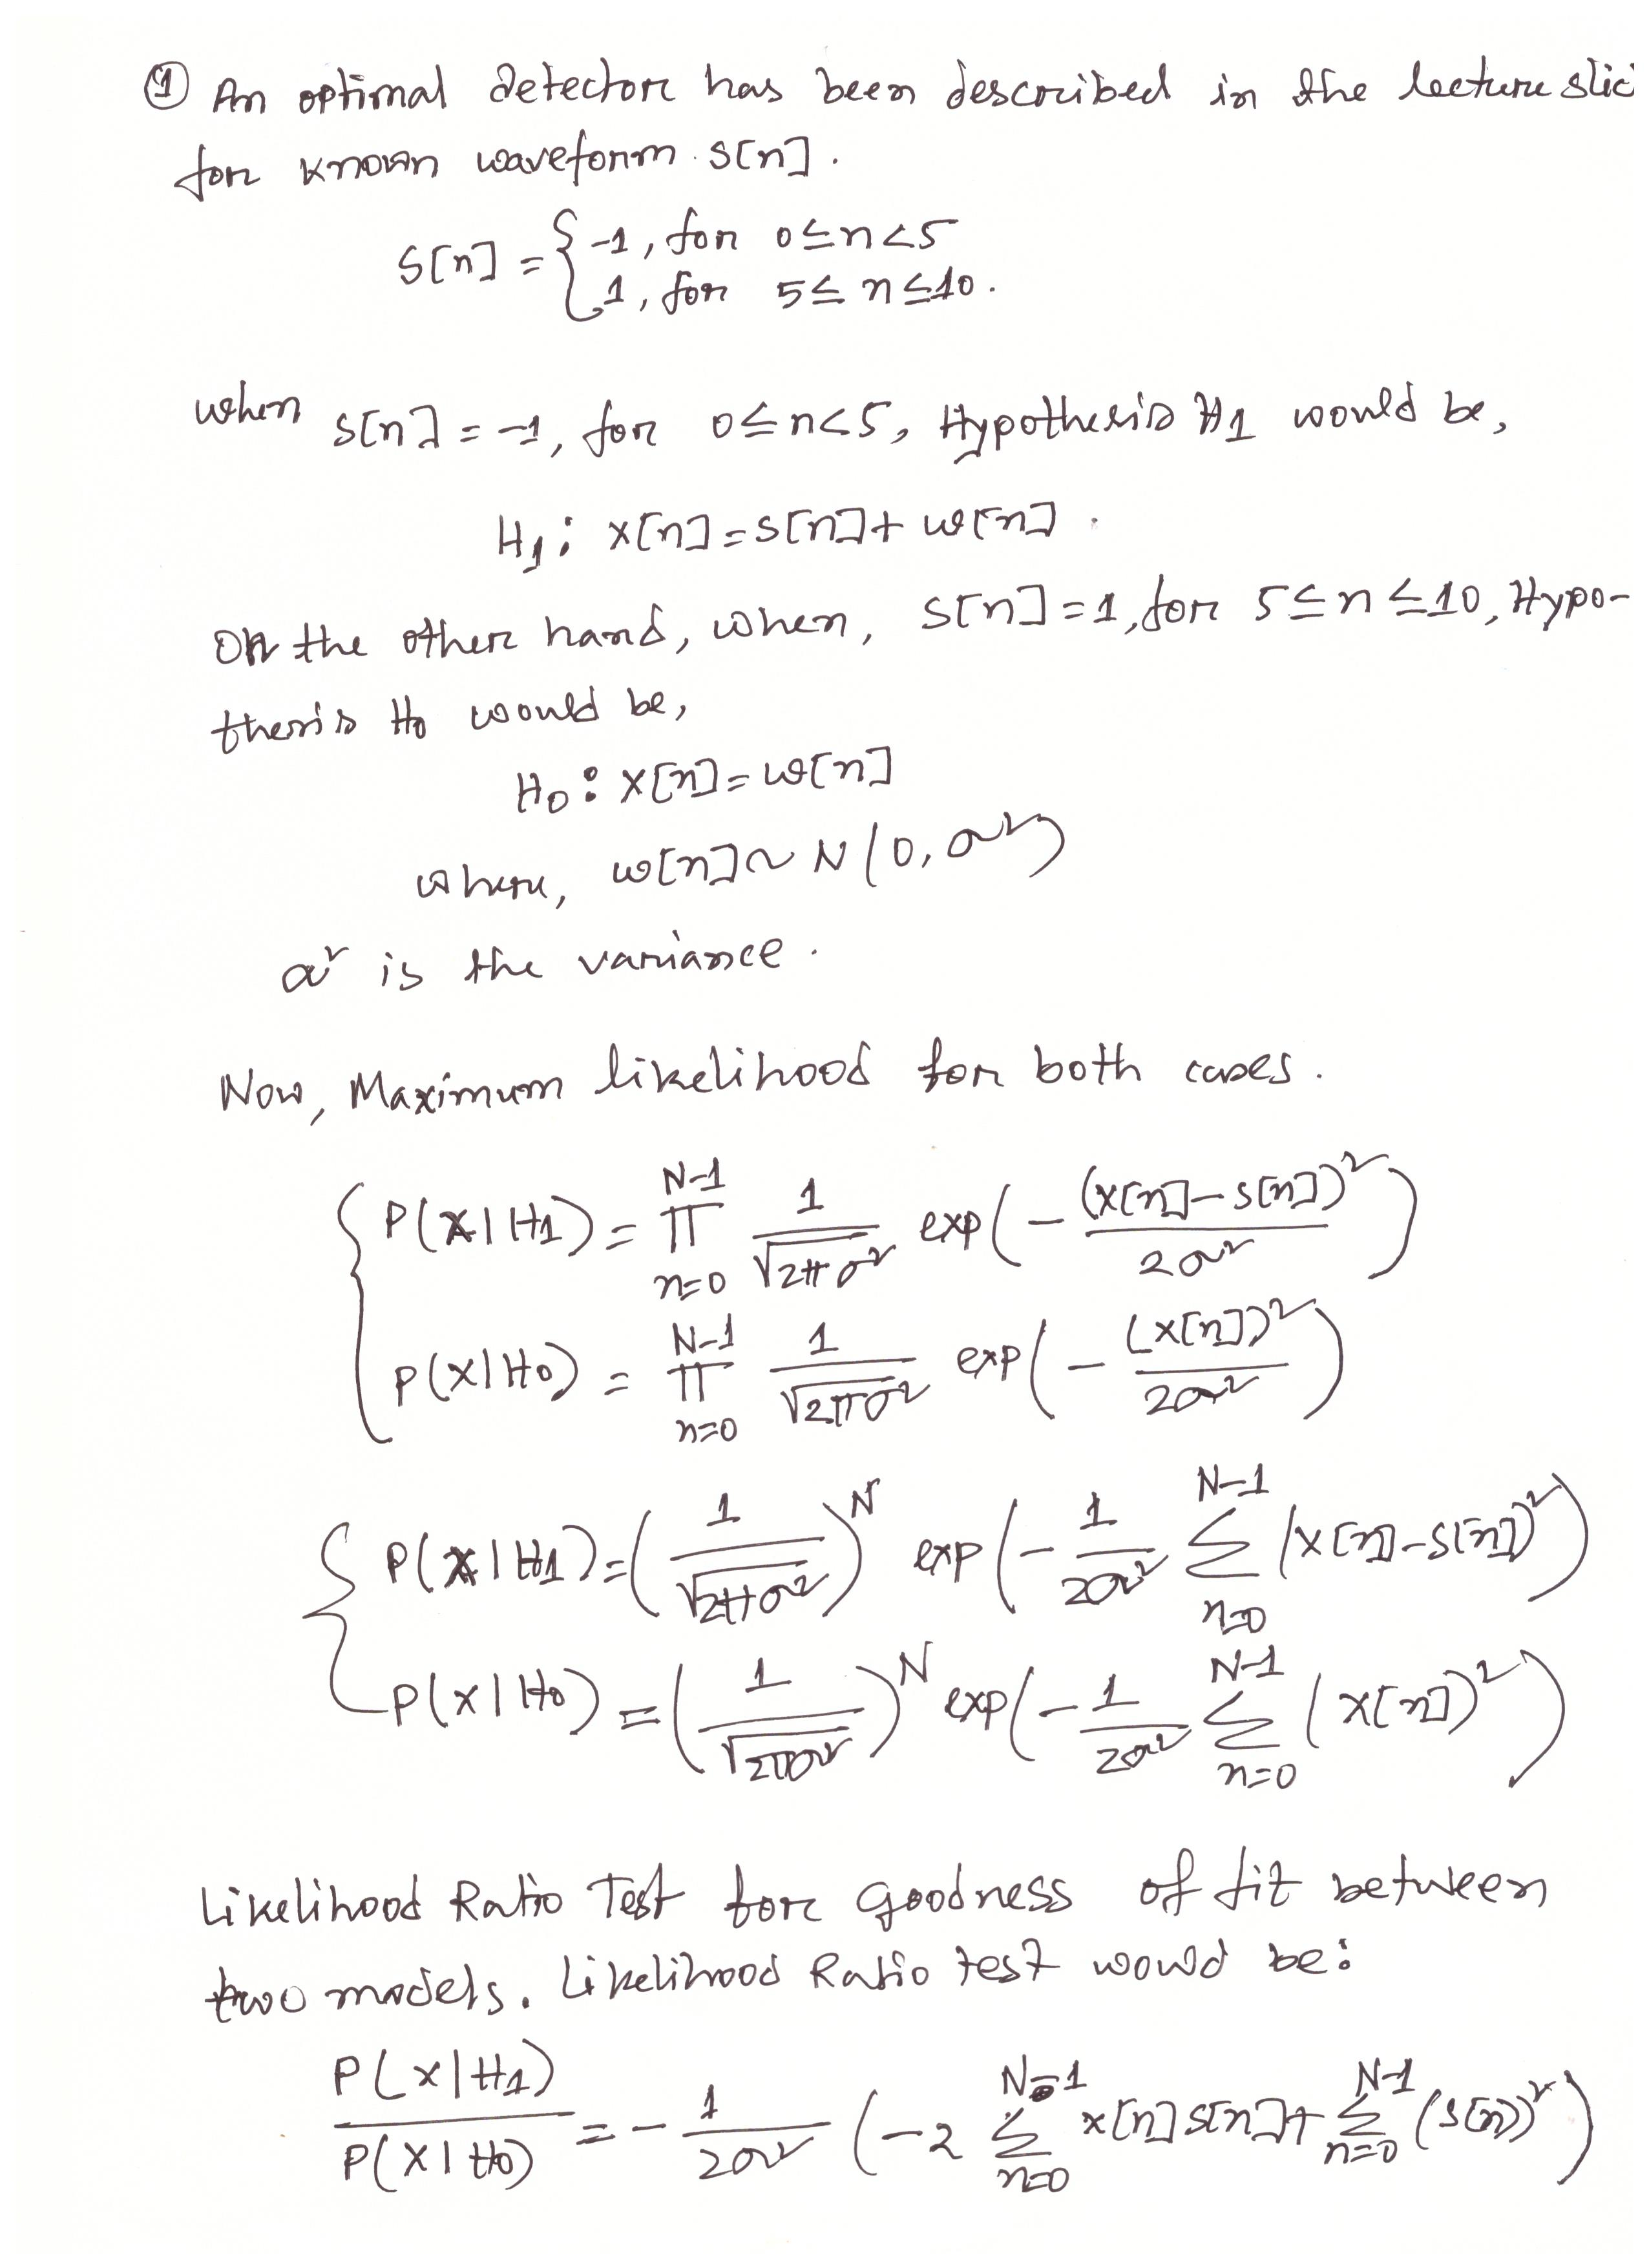
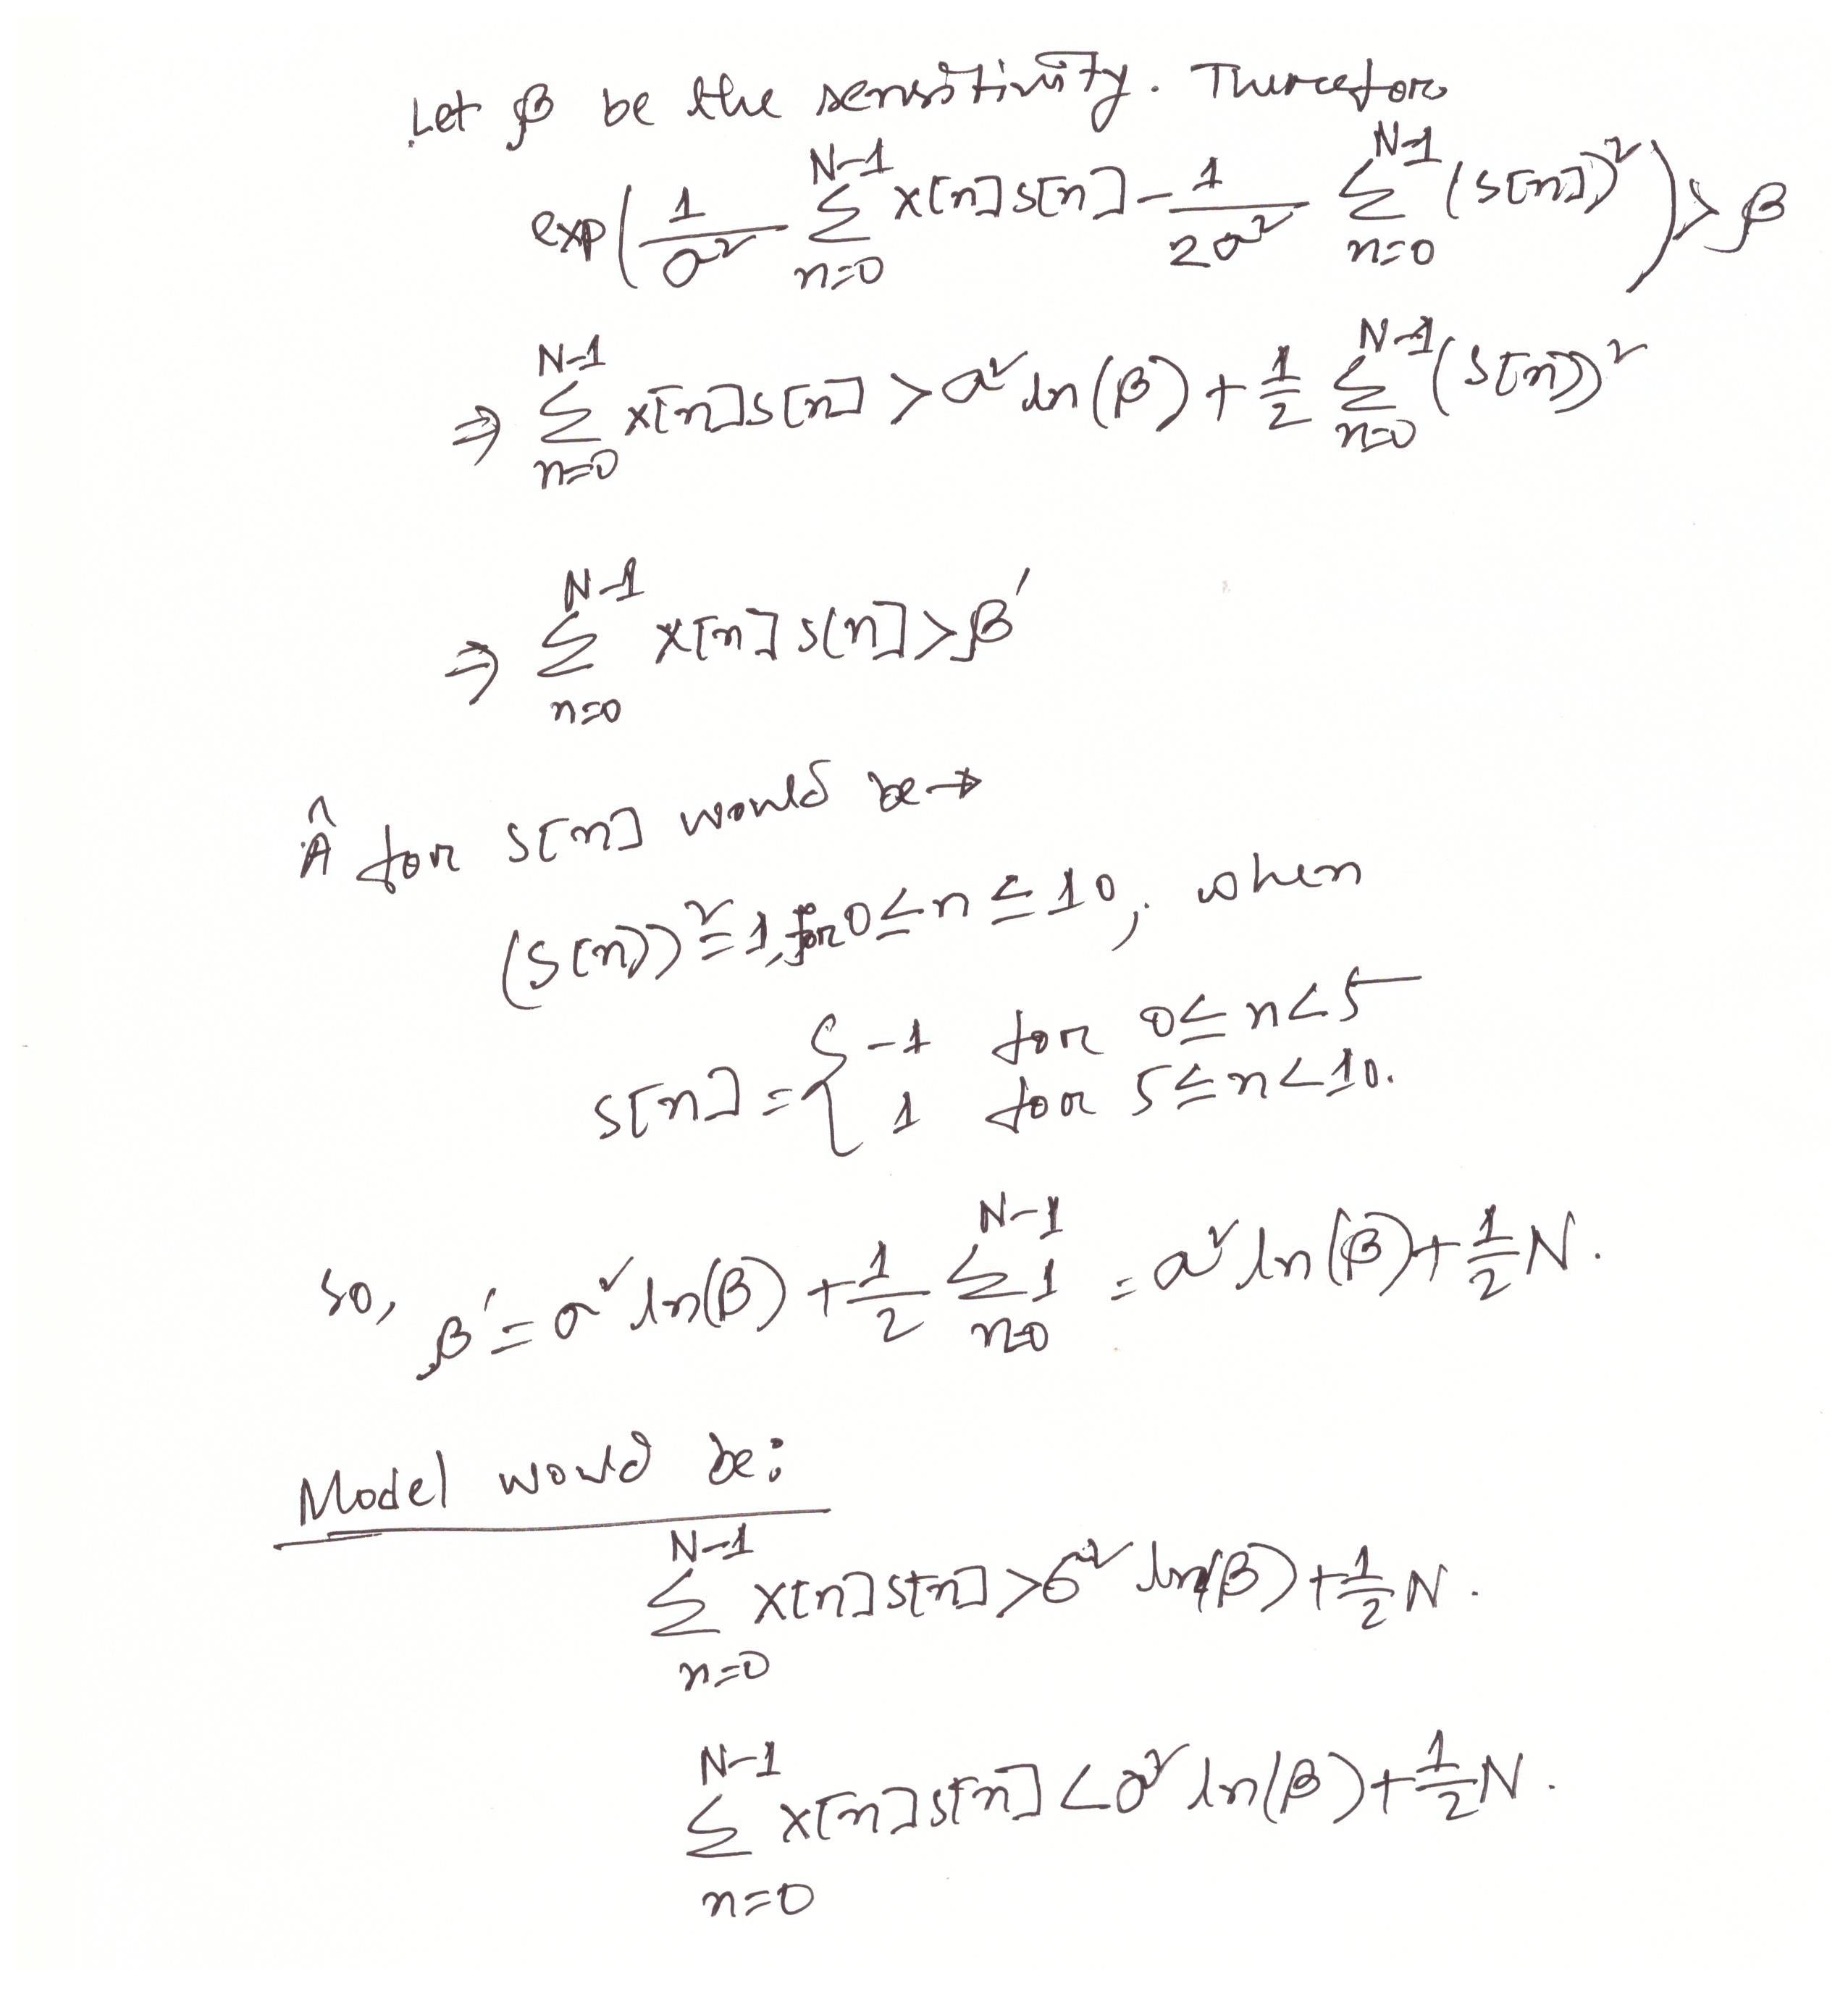

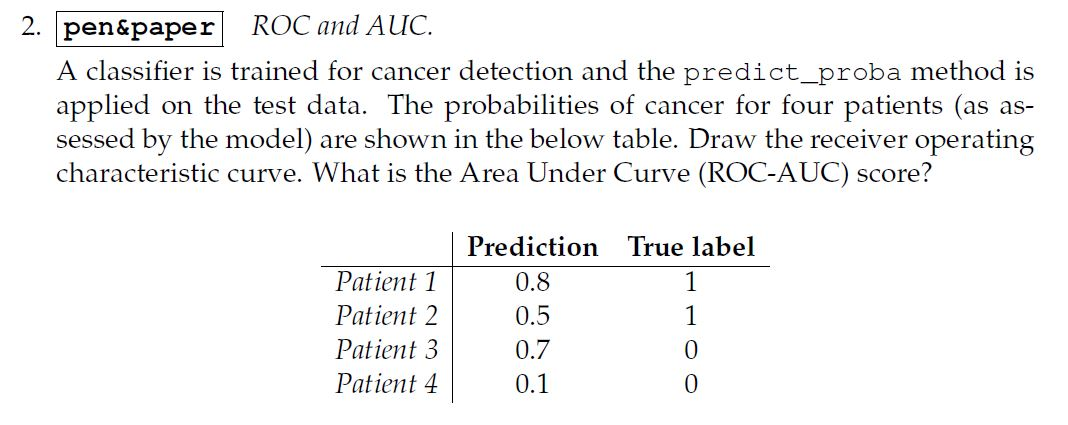


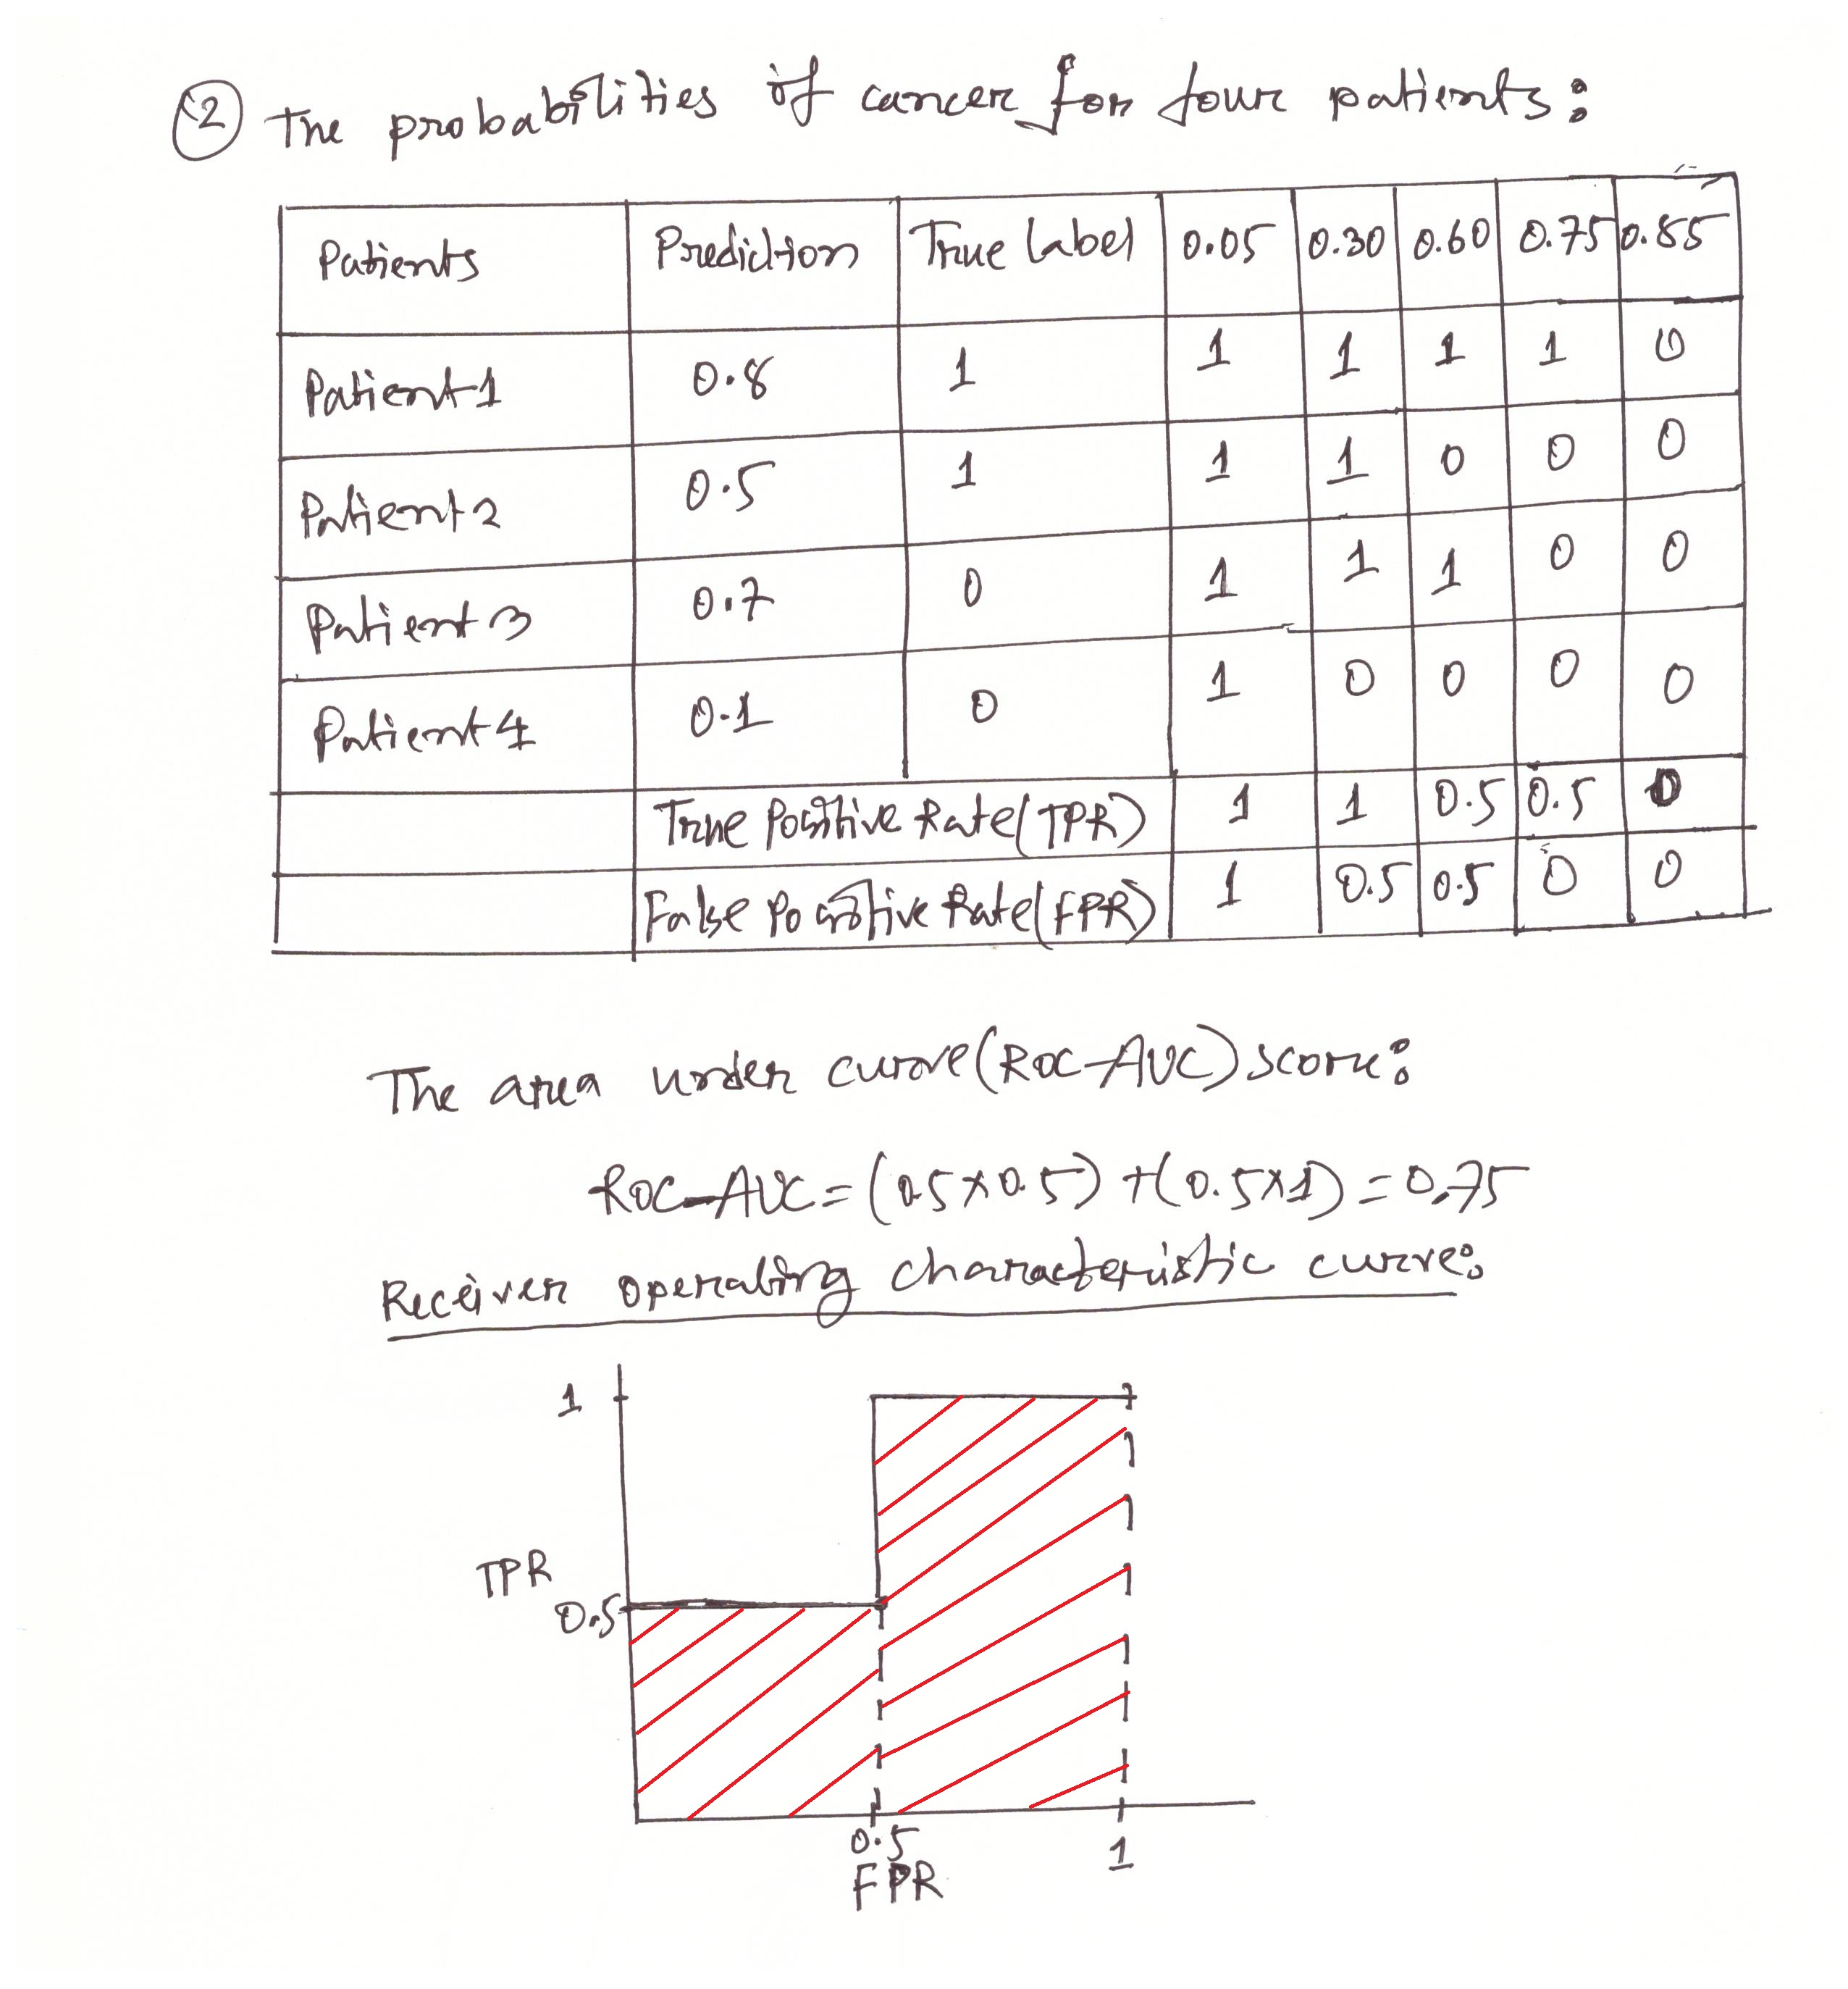

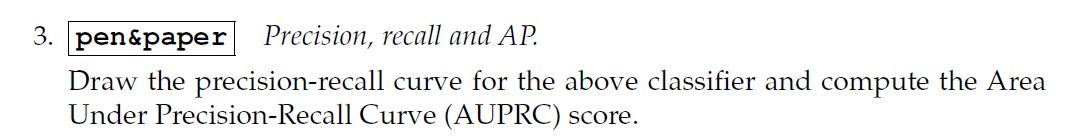

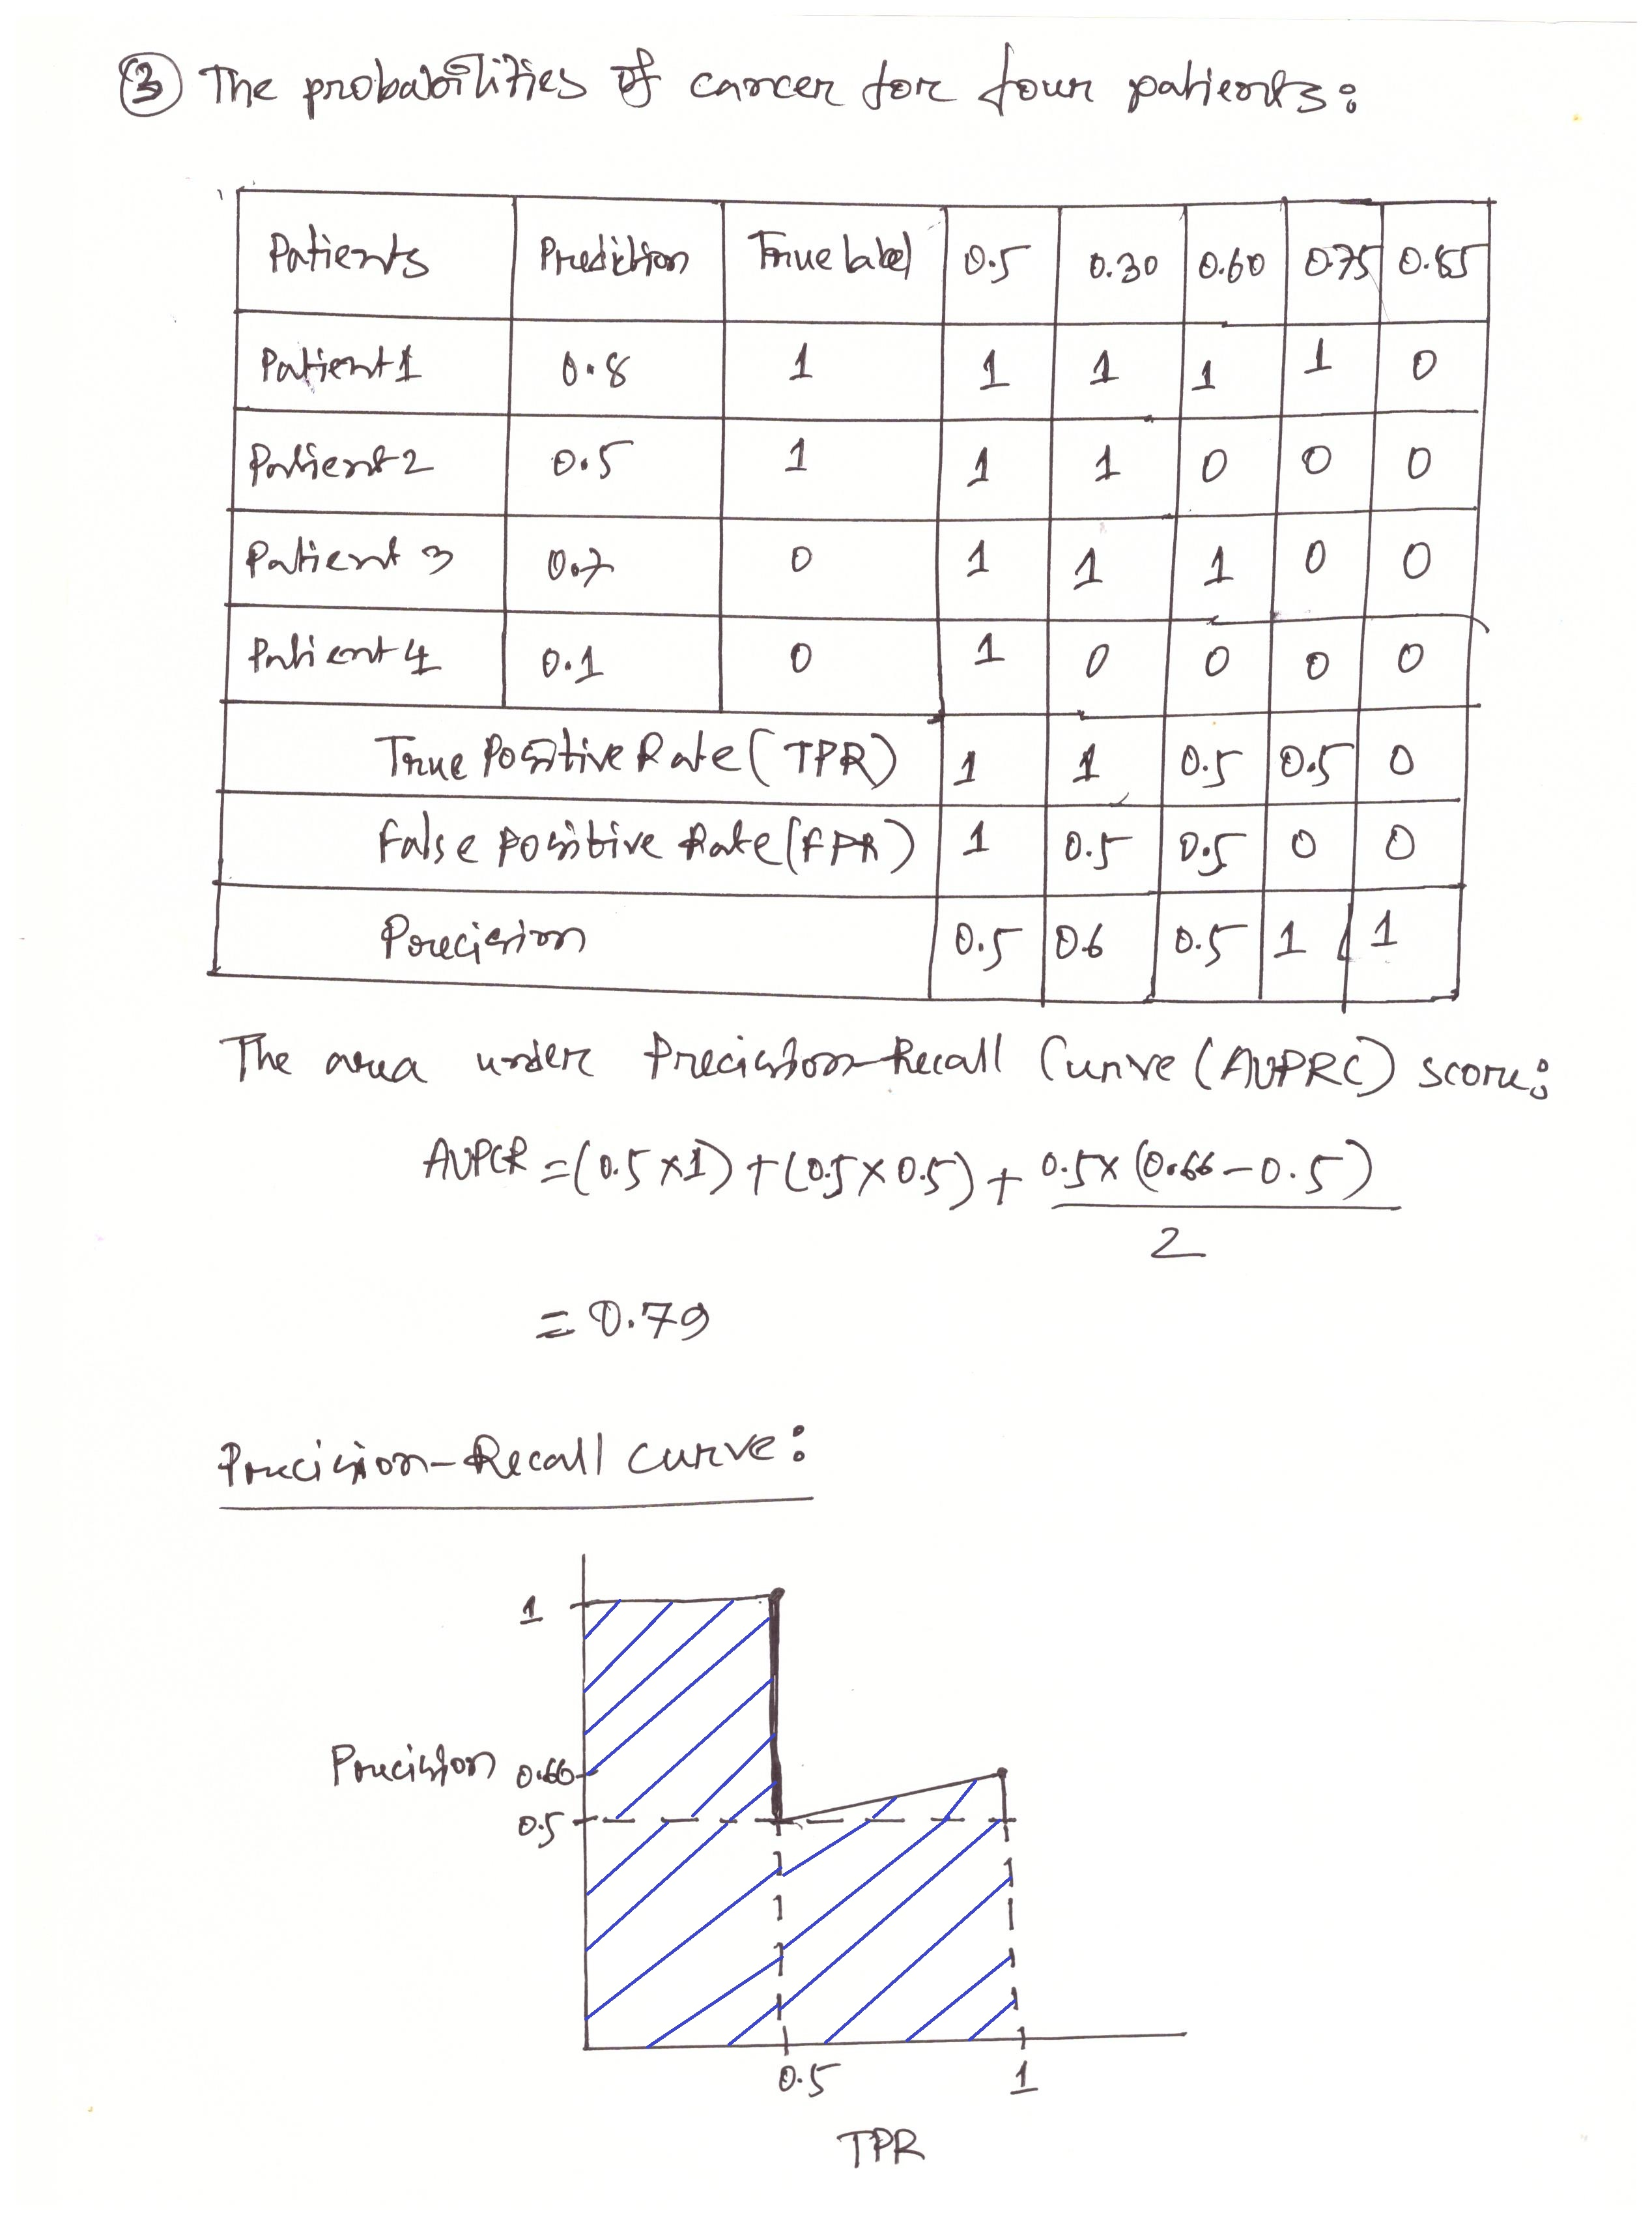

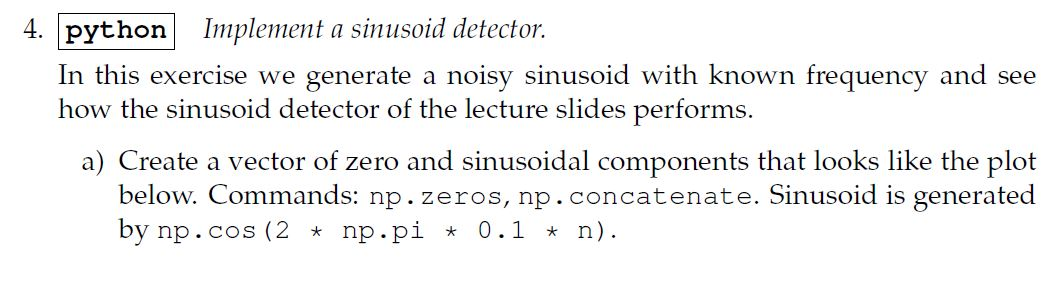

In [1]:
import numpy as np

sinusoid=np.cos(2*np.pi*0.1*np.arange(100)).reshape(-1,1)
concat=np.concatenate((np.zeros((1,500)).reshape(-1,1), sinusoid, np.zeros((1,400)).reshape(-1,1)))

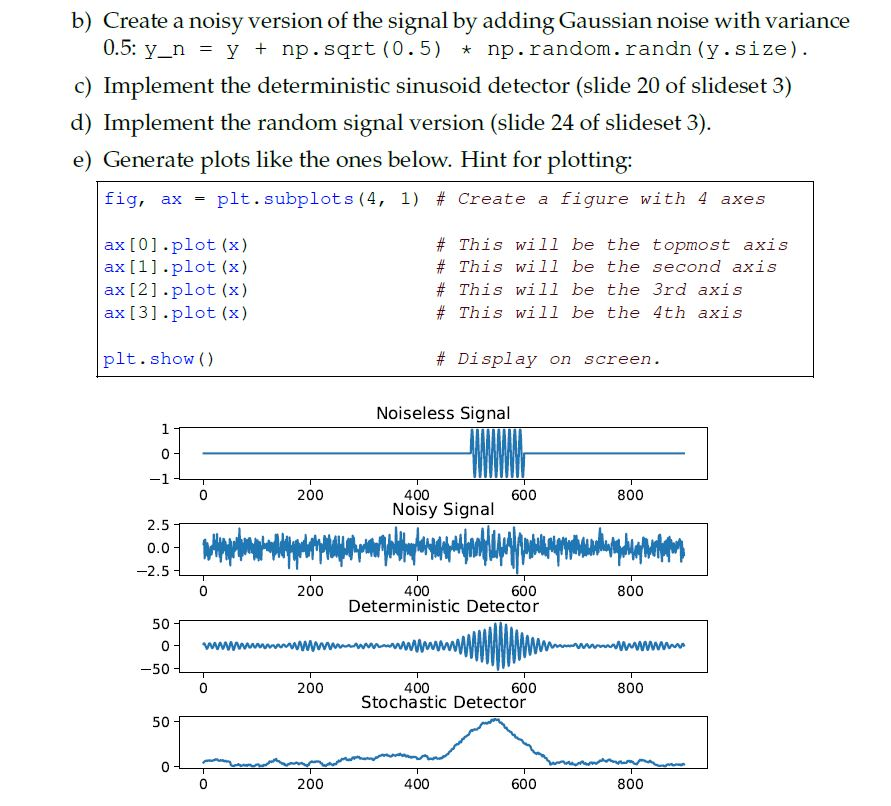

In [2]:
varience=0.5
y_n=concat+np.sqrt(varience)*np.random.randn(concat.size,1)

In [3]:
rdet=np.convolve(sinusoid[:,0],y_n[:,0],'same')

In [4]:
rsv=np.exp(-2*np.pi*1j*0.1*np.arange(100)).reshape(-1,1)
rstoch=np.abs(np.convolve(rsv[:,0],y_n[:,0],'same'))

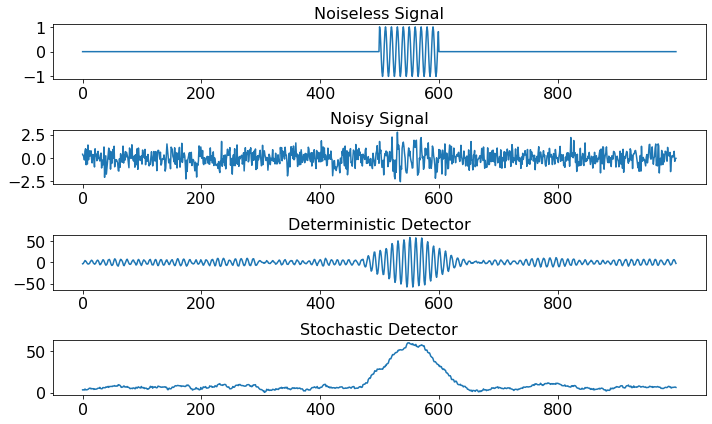

In [11]:

import matplotlib.pyplot as plt
ticks = [-2.5, 0, 2.5]

fig,ax=plt.subplots(4,1,figsize=(10,6))

ax[0].plot(concat)
ax[0].set_title("Noiseless Signal",size=16)
ax[0].set_xticks(range(0, 1000, 200))
ax[0].set_yticks(range(-1, 2, 1))
ax[0].tick_params(labelsize=16)

ax[1].plot(y_n)
ax[1].set_title("Noisy Signal",size=16)
ax[1].set_xticks(range(0, 1000, 200))
ax[1].set_yticks(ticks)
ax[1].tick_params(labelsize=16)

ax[2].plot(rdet)
ax[2].set_title("Deterministic Detector", size=16)
ax[2].set_xticks(range(0, 1000, 200))
ax[2].set_yticks(range(-50, 55, 50))
ax[2].tick_params(labelsize=16)

ax[3].plot(rstoch)
ax[3].set_title("Stochastic Detector",size=16)
ax[3].set_xticks(range(0, 1000, 200))
ax[3].set_yticks(range(0, 55, 50))
ax[3].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

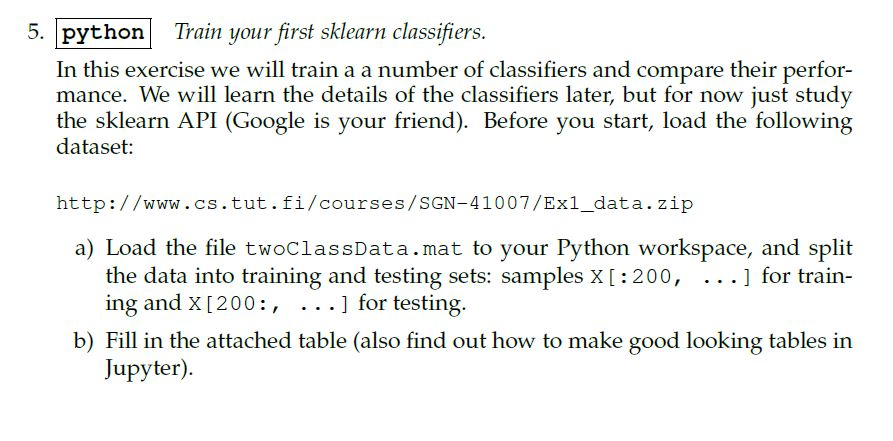

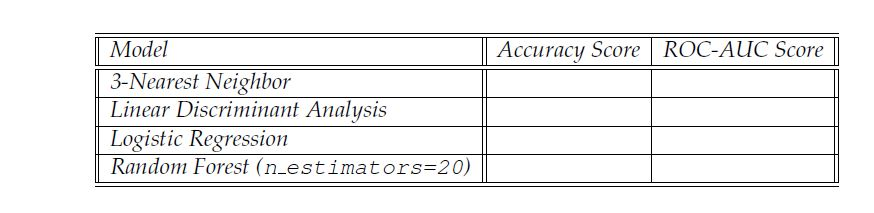

In [6]:
from scipy.io import loadmat

matdata=loadmat("twoClassData.mat")
X=matdata["X"]
y=matdata["y"].ravel()

train_X,test_X=X[:200,:],X[200:,:]
train_y,test_y=y[:200],y[200:]

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import*
from sklearn.neighbors import*
from sklearn.discriminant_analysis import*
from sklearn.ensemble import*
from sklearn.metrics import*

modelname=['3-Nearest Neighbor','Linear Discriminant Analysis','Logistic Regression','Random Forest(n_estimators=20)']
columnname=["Accuracy Score","ROC-AUC Score"]

data_frame=pd.DataFrame(columns=columnname, index=modelname)

models=[(modelname[0],KNeighborsClassifier(n_neighbors=3)),(modelname[1],LinearDiscriminantAnalysis()),
        (modelname[2],LogisticRegression(solver='lbfgs')),(modelname[3],RandomForestClassifier(n_estimators=20))]    


In [8]:
for n, modl in models:
    modl.fit(train_X,train_y)
    predict_y=modl.predict(test_X)
    
    data_frame.index.name="Model"
    data_frame.loc[n,"Accuracy Score"]=accuracy_score(test_y,predict_y)
    
    predict_prob=modl.predict_proba(test_X)
    data_frame.loc[n,"ROC-AUC Score"]=roc_auc_score(test_y,predict_prob.max(axis=1))

In [9]:
from IPython.display import display, HTML
display(data_frame)

,Accuracy Score,ROC-AUC Score
Model,,
3-Nearest Neighbor,0.85,0.479292
Linear Discriminant Analysis,0.91,0.479792
Logistic Regression,0.92,0.552821
Random Forest(n_estimators=20),0.865,0.477041


In [10]:
# Manually

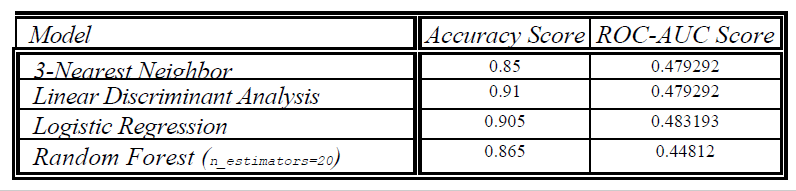

In [2]:
print("Results for {}:".format(name))
print(30*"-")

print("Accuracy is {x:.2f} %\nTraining time total: {y:.4f} s\nTest time / sample: {z:.4f} ms\n\n".format(x=accuracyscore*100, y=elapsed_time1, z=elapsed_time2_per_sample*1000))


Results for bangla:
------------------------------
Accuracy is 1000.00 %
Training time total: 15.0000 s
Test time / sample: 20000.0000 ms


